# Analsisa Pemasaran

Anda berhasil menunjukkan kinerja yang cemerlang selama mengikuti kursus Practicum, dan Anda pun ditawarkan kesempatan untuk menjalani program magang di departemen analitik perusahaan Y.Afisha. Tugas pertama yang mereka berikan kepada Anda adalah membantu mengoptimalkan anggaran biaya pemasaran.

<b>Pertanyaan:</b>

   1. Bagaimana para pengguna menggunakan produk Y.Afisha?
   2. Kapan mereka mulai melakukan pembelian?
   3. Berapa jumlah uang yang disumbangkan oleh setiap pengguna?
   4. Kapan semua biaya pemasaran terbayarkan?
   
<b>Objektif:</b>
   1. Membantu mengoptimalkan anggaran biaya pemasaran

<b>Tahapan:</b><a id='back'></a>

1. [Ikhtisar Data](#Mulai)
2. [Pra-pemprosesan Data](#Pra-pemrosesan)
3. [*Exploratory Data Analysis*](#EDA)
    - [Jumlah orang yang menggunakan produk setiap hari, minggu, dan bulan](#1)
    - [Jumlah sesi per hari](#2)
    - [Lama durasi untuk setiap sesi](#3)
    - [Seberapa sering pengguna kembali menggunakan produk](#4)
    - [Kapan pengguna mulai melakukan pembelian](#5)
    - [Jumlah pesanan yang dibuat selama periode waktu tertentu](#6)
    - [Besar rata-rata pembelian](#7)
    - [Jumlah uang yang dikontribusikan (LTV)](#8)
    - [Jumlah uang yang dihabiskan](#9)
    - [Biaya akuisisi pelanggan dari masing-masing sumber (CAC)](#10)
    - [Seberapa menguntungkannya investasi tersebut (ROMI)](#11)
5. [Kesimpulan Umum](#Kesimpulan)

## Ikhtisar Data <a id="Mulai"></a>

In [1]:
# Memuat semua library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

**Dataset pertama**

In [2]:
# Memuat dataset
data_1 = 'Y:\\Online Course\\Practicum\\Jupyter Notebook\\7 Project\\visits_log_us.csv'
visits_log = pd.read_csv(
    data_1,
    dtype = {
        'Device' : 'category',
        'Source Id' : 'category'
    },
    parse_dates = ['End Ts', 'Start Ts']
)

In [3]:
# Informasi umum
visits_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Device     359400 non-null  category      
 1   End Ts     359400 non-null  datetime64[ns]
 2   Source Id  359400 non-null  category      
 3   Start Ts   359400 non-null  datetime64[ns]
 4   Uid        359400 non-null  uint64        
dtypes: category(2), datetime64[ns](2), uint64(1)
memory usage: 8.9 MB


In [4]:
# Ukuran dataset
visits_log.shape

(359400, 5)

In [5]:
# Sampel data
visits_log.head()

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


Dokumentasi tabel `visits` (log/catatan server yang memuat data kunjungan ke situs web):
- `Uid` - ID pengguna
- `Device` - perangkat pengguna
- `Start Ts` - tanggal dan waktu dimulainya sesi
- `End Ts` - tanggal dan waktu berakhirnya sesi
- `Source Id` - ID sumber iklan, sumber yang digunakan pengguna untuk datang ke situs web

Semua tanggal dalam tabel ini menggunakan format YYYY-MM-DD.

In [6]:
# Memeriksa missing value
visits_log.isnull().sum()

Device       0
End Ts       0
Source Id    0
Start Ts     0
Uid          0
dtype: int64

In [7]:
# Memeriksa duplikasi
visits_log.duplicated().sum()

0

Untuk dataset ini penamaan yang menggunakan huruf kapital dan penggunaan spasi perlu diperbaiki.

**Dataset kedua**

In [8]:
# Memuat dataset
data_2 = 'Y:\\Online Course\\Practicum\\Jupyter Notebook\\7 Project\\orders_log_us.csv'
orders_log = pd.read_csv(
    data_2,
    parse_dates=['Buy Ts']
)

In [9]:
# Informasi umum
orders_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Buy Ts   50415 non-null  datetime64[ns]
 1   Revenue  50415 non-null  float64       
 2   Uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


In [10]:
# Ukuran dataset
orders_log.shape

(50415, 3)

In [11]:
# Sampel data
orders_log.head()

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


Dokumentasi tabel `orders` (data terkait pesanan):

- `Uid` - ID pengguna yang membuat pesanan
- `Buy Ts` - tanggal dan waktu pesanan dibuat
- `Revenue` - pendapatan Y.Afisha dari pesanan tersebut

In [12]:
# Memeriksa missing value
orders_log.isnull().sum()

Buy Ts     0
Revenue    0
Uid        0
dtype: int64

In [13]:
# Memeriksa duplikasi
orders_log.duplicated().sum()

0

Sama seperti halnya pada dataset pertama yang menggunakan huruf kapital dan spasi, penamaan kolom bisa diperbaiki.

**Dataset ketiga**

In [14]:
# Memuat dataset
data_3 = 'Y:\\Online Course\\Practicum\\Jupyter Notebook\\7 Project\\costs_us.csv'
costs = pd.read_csv(
    data_3,
    dtype = {'source_id': 'category'},
    parse_dates = ['dt']
)

In [15]:
# Informasi umum
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   category      
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: category(1), datetime64[ns](1), float64(1)
memory usage: 42.7 KB


In [16]:
# Ukuran dataset
costs.shape

(2542, 3)

In [17]:
# Sampel data
costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


Dokumentasi tabel `costs` (data terkait pengeluaran pemasaran):

- `source_id` - ID sumber iklan
- `dt` - tanggal
- `costs` - pengeluaran untuk sumber iklan pada tanggal tersebut

In [18]:
# Memeriksa missing value
costs.isnull().sum()

source_id    0
dt           0
costs        0
dtype: int64

In [19]:
# Memeriksa duplikasi
costs.duplicated().sum()

0

Semua tampak sudah bagus.

**Kesimpulan sementara**

1. visits_log dan orders_log, terdapat penamaan kolom yang bisa diperbaiki seperti penggunaan huruf kapital pada awal kata dan juga penggunaan spasi sebagai pemisah kata

2. costs, Untuk dataset ini semuanya tampak sudah siap supaya bisa dianalisis lebih lanjut.

[Kembali ke tahapan](#back)

## Pra-pemprosesan Data <a id="Pra-pemrosesan"></a>

**visits_log**

In [20]:
# Memeriksa nama kolom
visits_log.columns

Index(['Device', 'End Ts', 'Source Id', 'Start Ts', 'Uid'], dtype='object')

In [21]:
# Merubah nama kolom
visits_log = visits_log.rename(columns={
    'End Ts' : 'end_ts',
    'Source Id' : 'source_id',
    'Start Ts' : 'start_ts'
})

# Merubah huruf menjadi kecil
visits_log.columns = visits_log.columns.str.lower()

In [22]:
# Memeriksa hasilnya
visits_log.columns

Index(['device', 'end_ts', 'source_id', 'start_ts', 'uid'], dtype='object')

In [23]:
# Ukuran dataset
visits_log.shape

(359400, 5)

In [24]:
# Memfilter data
visits_log = visits_log.loc[~(visits_log['start_ts'] > visits_log['end_ts'])]

In [25]:
# Memeriksa hasilnya
visits_log.shape

(359398, 5)

Dataset ini sudah berhasil diperbaiki.

**orders_log**

In [26]:
# Memeriksa nama kolom
orders_log.columns

Index(['Buy Ts', 'Revenue', 'Uid'], dtype='object')

In [27]:
# Merubah nama kolom
orders_log = orders_log.rename(columns={
    'Buy Ts' : 'buy_ts',
    'Revenue' : 'revenue',
    'Uid' : 'uid'
})

In [28]:
# Memeriksa hasilnya
orders_log.columns

Index(['buy_ts', 'revenue', 'uid'], dtype='object')

Dataset ini sudah berhasil diperbaiki.

**Kesimpulan sementara**

Dataset yang perlu diperbaiki seperti dataset visits_log dan orders_log yang menggunakan huruf kapital dan spasi pada penamaan kolom sudah berhasil diperbaiki.

[Kembali ke tahapan](#back)

## *Exploratory Data Analysis* <a id="EDA"></a>

Proses selanjutnya yang akan dibahas adalah EDA (*Exploratory Data Analysis*) yang membahas beberapa pertanyaan untuk membantu proses analisa data dan mengambil kesimpulan dari hasil analisa.

### Jumlah orang yang menggunakan produk setiap hari, minggu, dan bulan <a id="1"></a>

In [29]:
# Dataset visits_log
visits_log.head()

,device,end_ts,source_id,start_ts,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [30]:
# Mendapatkan data tahun, bulan, minggu, hari, dan tanggal
visits_log['year']  = visits_log['start_ts'].astype('datetime64[Y]')
visits_log['month'] = visits_log['start_ts'].astype('datetime64[M]')
visits_log['week']  = visits_log['start_ts'].astype('datetime64[W]')
visits_log['date'] = visits_log['start_ts'].dt.date

*Vanity metric* merupakan sebuah parameter yang bisa membuat strategi pemasaran terlihat memuaskan. Metrik ini memainkan peran penting dalam membangun motivasi tim. Dalam hal ini parameter tersebut adalah DAU (*Daily Active Users*), WAU (*Weekly Active Users*), dan MAU (*Monthly Active Users*).

In [31]:
# Menghitung DAU, WAU, dan MAU
dau_total = visits_log.groupby('date').agg({'uid' : 'nunique'}).mean()
wau_total = visits_log.groupby(['year', 'week']).agg({'uid' : 'nunique'}).mean()
mau_total = visits_log.groupby(['year', 'month']).agg({'uid' : 'nunique'}).mean()

In [32]:
# Menampilkan hasilnya
print('Jumlah pengguna produk setiap hari:', dau_total[0])
print('Jumlah pengguna produk setiap minggu:', wau_total[0])
print('Jumlah pengguna produk setiap bulan:', mau_total[0])

Jumlah pengguna produk setiap hari: 907.9917582417582
Jumlah pengguna produk setiap minggu: 5621.7037037037035
Jumlah pengguna produk setiap bulan: 23228.416666666668


Seperti yang terlihat terdapat sekitar 908 pengguna per hari yang menggunakan produk, sekitar 5716 pengguna per minggu, dan 23228 pengguna perbulan.

[Kembali ke tahapan](#back)

### Jumlah sesi per hari <a id="2"></a>

In [33]:
# Agg berdasarkan tahun, dan hari
visits_per_user = visits_log.groupby(['date']).agg({
    'uid': ['count', 'nunique']
})

# Merubah nama kolom
visits_per_user.columns = ['n_sessions', 'n_users']

# Jumlah sesi user
visits_per_user['sessions_per_user'] = (visits_per_user['n_sessions'] / visits_per_user['n_users'])

In [34]:
# Memeriksa hasilnya
visits_per_user

,n_sessions,n_users,sessions_per_user
date,,,
2017-06-01,664,605,1.097521
2017-06-02,658,608,1.082237
2017-06-03,477,445,1.071910
2017-06-04,510,476,1.071429
2017-06-05,893,820,1.089024
...,...,...,...
2018-05-27,672,620,1.083871
2018-05-28,1156,1039,1.112608
2018-05-29,1035,948,1.091772


In [35]:
# Melihat deskripsi kolom
visits_per_user['sessions_per_user'].describe()

count    364.000000
mean       1.082166
std        0.020873
min        1.000000
25%        1.070321
50%        1.082488
75%        1.093876
max        1.217837
Name: sessions_per_user, dtype: float64

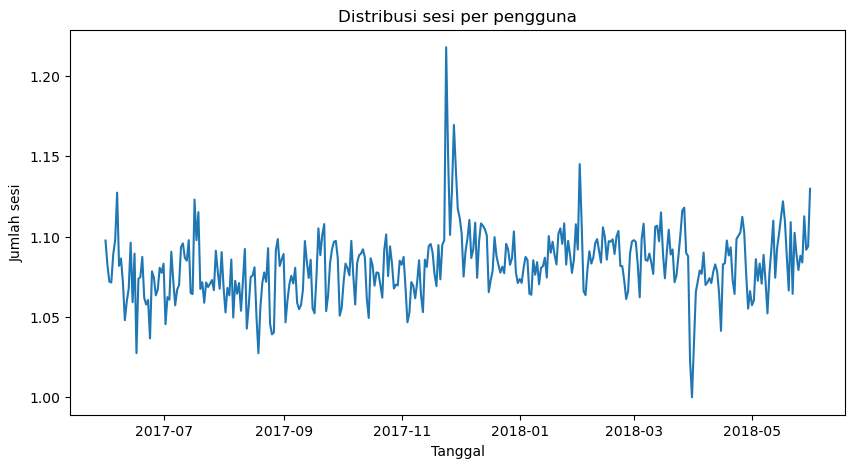

In [36]:
# Memeriksa distribusinya
visits_per_user['sessions_per_user'].plot(kind='line', figsize=(10,5))

# Judul
plt.title("Distribusi sesi per pengguna")

# Penamaan x,y-axis
plt.xlabel('Tanggal')
plt.ylabel('Jumlah sesi')

# Menampilkan hasilnya
plt.show()

Rata-rata setiap pengguna menghabiskan paling tidak melakukan 1 sesi perhari untuk menggunakan produk.

[Kembali ke tahapan](#back)

### Lama durasi untuk setiap sesi <a id="3"></a>

ASL(*Average Session Length*) merupakan jumlah waktu yang dihabiskan pengguna selama menggunakan produk dalam sesi rata-rata.

In [37]:
# Menghitung durasi setiap sesi
visits_log['visit_duration_sec'] = (visits_log['end_ts'] - visits_log['start_ts']).dt.seconds

In [38]:
# Melihat deskripsi kolom
visits_log['visit_duration_sec'].describe()

count    359398.000000
mean        643.042287
std         997.105212
min           0.000000
25%         120.000000
50%         300.000000
75%         840.000000
max       42660.000000
Name: visit_duration_sec, dtype: float64

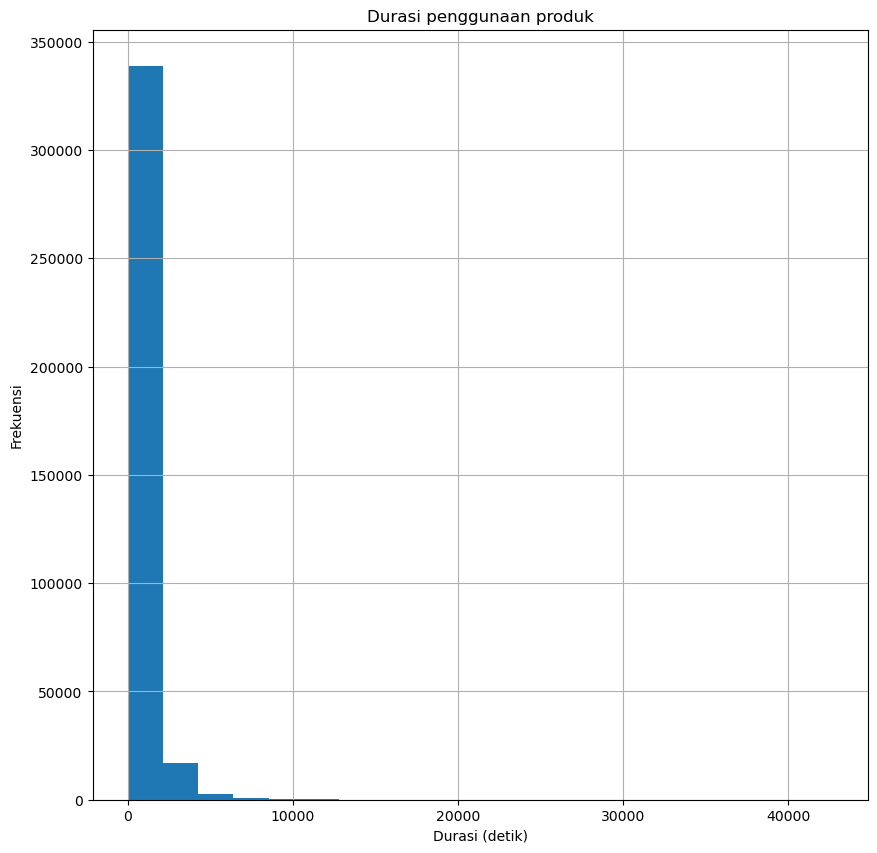

In [39]:
# Memeriksa distribusinya
visits_log['visit_duration_sec'].hist(bins=20, figsize = (10,10))

# Judul histogram
plt.title("Durasi penggunaan produk")

# Penamaan x,y-axis
plt.xlabel('Durasi (detik)')
plt.ylabel('Frekuensi')

# Menampilkan hasilnya
plt.show()

Jika distribusinya normal atau mendekati normal, maka bisa menggunakan nilai *mean* atau *median*, namun seperti yang terlihat untuk kali ini tidak memungkinkan, jadi akan menggunakan nilai *modus*-nya.

In [40]:
# Menghitung modusnya
visits_log['visit_duration_sec'].mode()

0    60
Name: visit_duration_sec, dtype: int64

60 detik merupakan durasi waktu yang paling banyak dihabiskan oleh pengguna disetiap sesi.

[Kembali ke tahapan](#back)

### Seberapa sering pengguna kembali menggunakan produk <a id="4"></a>

Selain *vanity metric* diatas, terdapat *sticky factor* yang menunjukkan tingkat loyalitas audiens atau seberapa sering pengguna kembali ke produk.

In [41]:
# Menghitung sticky factor
sticky_wau = dau_total / wau_total * 100
sticky_mau = dau_total / mau_total * 100

In [42]:
# Memeriksa hasilnya
print('Sticky factor mingguan:', sticky_wau[0])
print('Sticky factor bulanan:', sticky_mau[0])

Sticky factor mingguan: 16.151540637823956
Sticky factor bulanan: 3.908969652437603


Sekitar 4% dalam sebulan dan sekitar 16% dalam seminggu kemungkinan pengguna kembali menggunakan produk.

In [43]:
# Dataset visits_log
visits_log.head()

,device,end_ts,source_id,start_ts,uid,year,month,week,date,visit_duration_sec
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-01-01,2017-12-01,2017-12-14,2017-12-20,1080
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-01-01,2018-02-01,2018-02-15,2018-02-19,1680
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-01-01,2017-07-01,2017-06-29,2017-07-01,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-01-01,2018-05-01,2018-05-17,2018-05-20,1440
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-01-01,2017-12-01,2017-12-21,2017-12-27,0


In [44]:
# Mendapatkan tanggal pertama pesanan dilakukan
first_visit= visits_log.groupby('uid').agg({
    'start_ts' : 'min'
}).reset_index()

# Memberi nama kolom
first_visit.columns = ['uid', 'first_start_ts']

In [45]:
# Memeriksa hasilnya
first_visit.head()

,uid,first_start_ts
0,11863502262781,2018-03-01 17:27:00
1,49537067089222,2018-02-06 15:55:00
2,297729379853735,2017-06-07 18:47:00
3,313578113262317,2017-09-18 22:49:00
4,325320750514679,2017-09-30 14:29:00


In [46]:
# Mengambil tanggal
first_visit['first_visit_date'] = first_visit['first_start_ts'].dt.date

# Mengambil bulan
first_visit['first_visit_month'] = first_visit['first_start_ts'].astype('datetime64[M]')

In [47]:
# Menggabungkan dataset
visits_merge = pd.merge(visits_log, first_visit, on='uid')

In [48]:
# Sampel data
visits_merge.head(3)

,device,end_ts,source_id,start_ts,uid,year,month,week,date,visit_duration_sec,first_start_ts,first_visit_date,first_visit_month
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-01-01,2017-12-01,2017-12-14,2017-12-20,1080,2017-12-20 17:20:00,2017-12-20,2017-12-01
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-01-01,2018-02-01,2018-02-15,2018-02-19,1680,2018-02-19 16:53:00,2018-02-19,2018-02-01
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-01-01,2017-07-01,2017-06-29,2017-07-01,0,2017-07-01 01:54:00,2017-07-01,2017-07-01


In [49]:
# Menghitung lifetime pengguna per hari dan per bulan
visits_merge['lifetime_days'] = (visits_merge['date'] - visits_merge['first_visit_date']).dt.days
visits_merge['lifetime_month'] = round(visits_merge['lifetime_days']/30).astype('int')

In [50]:
# Kohort sesi per bulan
cohort_visits = visits_merge.pivot_table(
    index='first_visit_month',
    columns='lifetime_month',
    values='uid',
    aggfunc='nunique'
)

# Mengisi missing value
cohort_visits.fillna('')

lifetime_month,0,1,2,3,4,5,6,7,8,9,10,11,12
first_visit_month,,,,,,,,,,,,,
2017-06-01,13259.0,955.0,720.0,775.0,944.0,847.0,875.0,713.0,746.0,659.0,576.0,513.0,272.0
2017-07-01,13140.0,716.0,688.0,675.0,767.0,609.0,606.0,619.0,527.0,379.0,337.0,113.0,
2017-08-01,10181.0,691.0,634.0,577.0,547.0,412.0,438.0,340.0,299.0,243.0,58.0,,
2017-09-01,16704.0,1239.0,1117.0,816.0,683.0,642.0,571.0,420.0,366.0,61.0,,,
2017-10-01,25977.0,1858.0,1384.0,960.0,975.0,787.0,565.0,478.0,120.0,,,,
2017-11-01,27248.0,1849.0,1270.0,1016.0,900.0,639.0,520.0,107.0,,,,,
2017-12-01,25268.0,1257.0,1057.0,719.0,577.0,400.0,101.0,,,,,,
2018-01-01,22624.0,1191.0,830.0,557.0,421.0,47.0,,,,,,,
2018-02-01,22197.0,1039.0,602.0,407.0,67.0,,,,,,,,


In [51]:
# Retention rate
retention=pd.DataFrame()

# Mengecualikan kolom pertama yaitu 0
for col in cohort_visits.columns[1:]:
    retention = pd.concat([retention, cohort_visits[col]/cohort_visits[0]*100], axis=1)
retention.columns = cohort_visits.columns[1:]

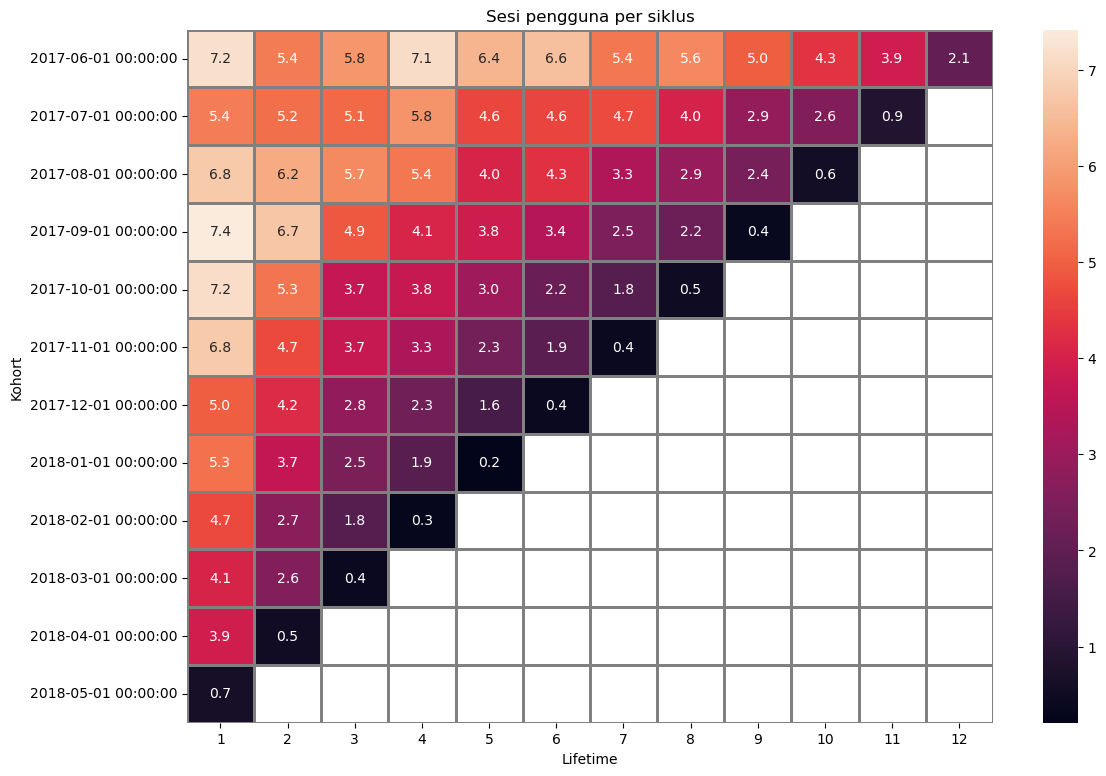

In [52]:
# Ukuran heatmap
plt.figure(figsize=(13, 9))

# Judul
plt.title('Sesi pengguna per siklus')

# Heatmap
sns.heatmap(
    retention,
    annot=True,
    fmt='.1f',
    linewidths=1,
    linecolor='gray',
)

# Penamaan x,y-axis
plt.xlabel('Lifetime')
plt.ylabel('Kohort')

# Menampilkan hasilnya
plt.show()

In [53]:
# Retention rate di siklus bulan ke 6
retention[6].mean()

3.344964355775797

Tidak lebih dari 7.5% pelanggan kembali menggunakan produk. Setiap bulan jumlah pelanggan yang kembali mengalami penurunan, hanya pada siklus bulan ke 4 yang naik di beberapa kohort. Dan jika dilihat lebih detail di siklus bulan ke 6 sekitar 3.35% pengguna kembali menggunakan produk.

[Kembali ke tahapan](#back)

### Kapan orang-orang mulai melakukan pembelian<a id="5"></a>

In [54]:
# Dataset orders_log
orders_log.head()

,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [55]:
# Mendapatkan tanggal pertama pesanan dilakukan
first_order = orders_log.groupby('uid').agg({
    'buy_ts' : 'min'
}).reset_index()

# Memberi nama kolom
first_order.columns = ['uid', 'first_order_date']

# Menampilkan hasilnya
first_order.head()

,uid,first_order_date
0,313578113262317,2018-01-03 21:51:00
1,1575281904278712,2017-06-03 10:13:00
2,2429014661409475,2017-10-11 18:33:00
3,2464366381792757,2018-01-28 15:54:00
4,2551852515556206,2017-11-24 10:14:00


In [56]:
# Mengambil tanggal
first_order['first_order_date'] = first_order['first_order_date'].dt.date

# Mengambil bulan
first_order['first_order_month'] = first_order['first_order_date'].astype('datetime64[M]')

In [57]:
# Sampel data
first_visit.head()

,uid,first_start_ts,first_visit_date,first_visit_month
0,11863502262781,2018-03-01 17:27:00,2018-03-01,2018-03-01
1,49537067089222,2018-02-06 15:55:00,2018-02-06,2018-02-01
2,297729379853735,2017-06-07 18:47:00,2017-06-07,2017-06-01
3,313578113262317,2017-09-18 22:49:00,2017-09-18,2017-09-01
4,325320750514679,2017-09-30 14:29:00,2017-09-30,2017-09-01


In [58]:
# Menggabungkan dataset
user_first_buy = pd.merge(first_visit, first_order, on='uid')

In [59]:
# Sampel data
user_first_buy.head()

,uid,first_start_ts,first_visit_date,first_visit_month,first_order_date,first_order_month
0,313578113262317,2017-09-18 22:49:00,2017-09-18,2017-09-01,2018-01-03,2018-01-01
1,1575281904278712,2017-06-03 10:13:00,2017-06-03,2017-06-01,2017-06-03,2017-06-01
2,2429014661409475,2017-10-11 17:14:00,2017-10-11,2017-10-01,2017-10-11,2017-10-01
3,2464366381792757,2018-01-27 20:10:00,2018-01-27,2018-01-01,2018-01-28,2018-01-01
4,2551852515556206,2017-11-24 10:14:00,2017-11-24,2017-11-01,2017-11-24,2017-11-01


In [60]:
# Melihat informasi umum
user_first_buy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36523 entries, 0 to 36522
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   uid                36523 non-null  uint64        
 1   first_start_ts     36523 non-null  datetime64[ns]
 2   first_visit_date   36523 non-null  object        
 3   first_visit_month  36523 non-null  datetime64[ns]
 4   first_order_date   36523 non-null  object        
 5   first_order_month  36523 non-null  datetime64[ns]
dtypes: datetime64[ns](3), object(2), uint64(1)
memory usage: 2.0+ MB


In [61]:
# Merubah tipe data
user_first_buy['first_visit_date'] = user_first_buy['first_visit_date'].astype('datetime64')
user_first_buy['first_order_date'] = user_first_buy['first_order_date'].astype('datetime64')

# Mendapatkan hari pertama pembelian
user_first_buy['first_purchase_days'] = (user_first_buy['first_order_date'] - user_first_buy['first_visit_date']).dt.days

In [62]:
# Sampel data
user_first_buy.head()

,uid,first_start_ts,first_visit_date,first_visit_month,first_order_date,first_order_month,first_purchase_days
0,313578113262317,2017-09-18 22:49:00,2017-09-18,2017-09-01,2018-01-03,2018-01-01,107
1,1575281904278712,2017-06-03 10:13:00,2017-06-03,2017-06-01,2017-06-03,2017-06-01,0
2,2429014661409475,2017-10-11 17:14:00,2017-10-11,2017-10-01,2017-10-11,2017-10-01,0
3,2464366381792757,2018-01-27 20:10:00,2018-01-27,2018-01-01,2018-01-28,2018-01-01,1
4,2551852515556206,2017-11-24 10:14:00,2017-11-24,2017-11-01,2017-11-24,2017-11-01,0


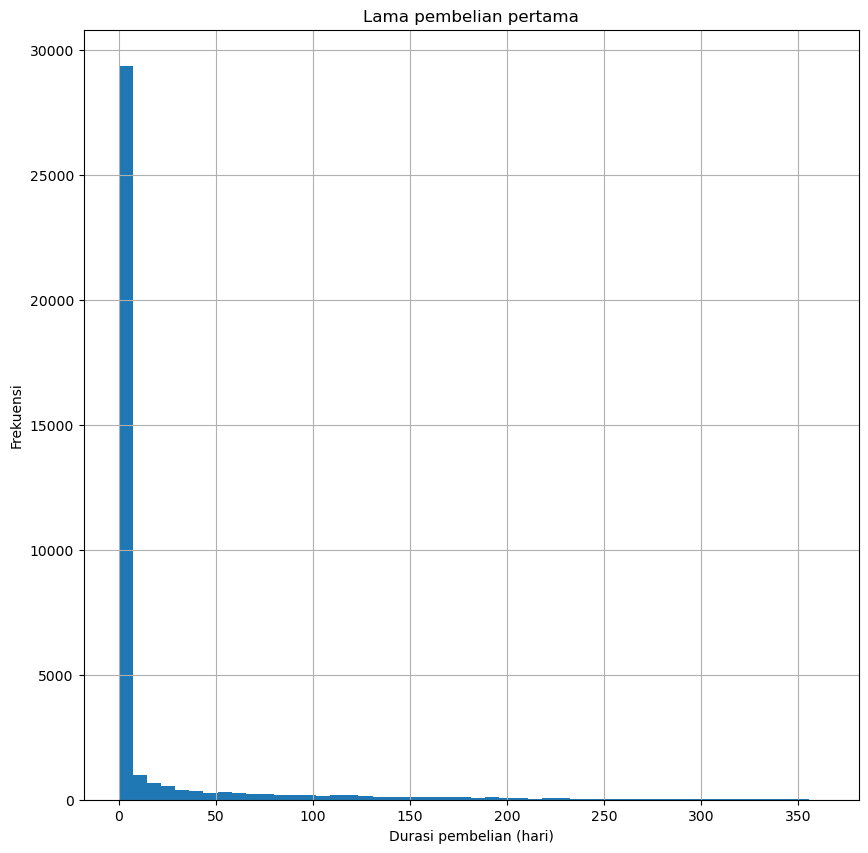

In [63]:
# Memeriksa distribusinya
user_first_buy['first_purchase_days'].hist(bins=50, figsize = (10,10))

# Judul histogram
plt.title("Lama pembelian pertama")

# Penamaan x,y-axis
plt.xlabel('Durasi pembelian (hari)')
plt.ylabel('Frekuensi')

# Menampilkan hasilnya
plt.show()

Dengan alasan yang sama, karena distribusinya tidak normal, maka akan menggunakan modusnya.

In [64]:
# Menghitung modusnya
user_first_buy['first_purchase_days'].mode()

0    0
Name: first_purchase_days, dtype: int64

Seperti yang terlihat kebanyakan disaat pengguna menggunakan produk mereka juga melakukan pembelian barang.

[Kembali ke tahapan](#back)

### Jumlah pesanan yang dibuat selama periode waktu tertentu <a id="6"></a>

In [65]:
# Sampel data
orders_log.head()

,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [66]:
# Mengambil bulan dari kolom `buy_ts`
orders_log['order_month'] = orders_log['buy_ts'].astype('datetime64[M]')

In [67]:
# Kohort pesanan berdasarkan hari
revenue_orders = orders_log.groupby(['order_month']).agg({
    'revenue' : 'sum',
    'buy_ts' : 'count'
})

revenue_orders.columns = ['revenue', 'transactions']

# Menampilkan hasilnya
revenue_orders

,revenue,transactions
order_month,,
2017-06-01,9557.49,2354
2017-07-01,12539.47,2363
2017-08-01,8758.78,1807
2017-09-01,18345.51,3387
2017-10-01,27987.70,5679
2017-11-01,27069.93,5659
2017-12-01,36388.60,6218
2018-01-01,19417.13,4721
2018-02-01,25560.54,5281


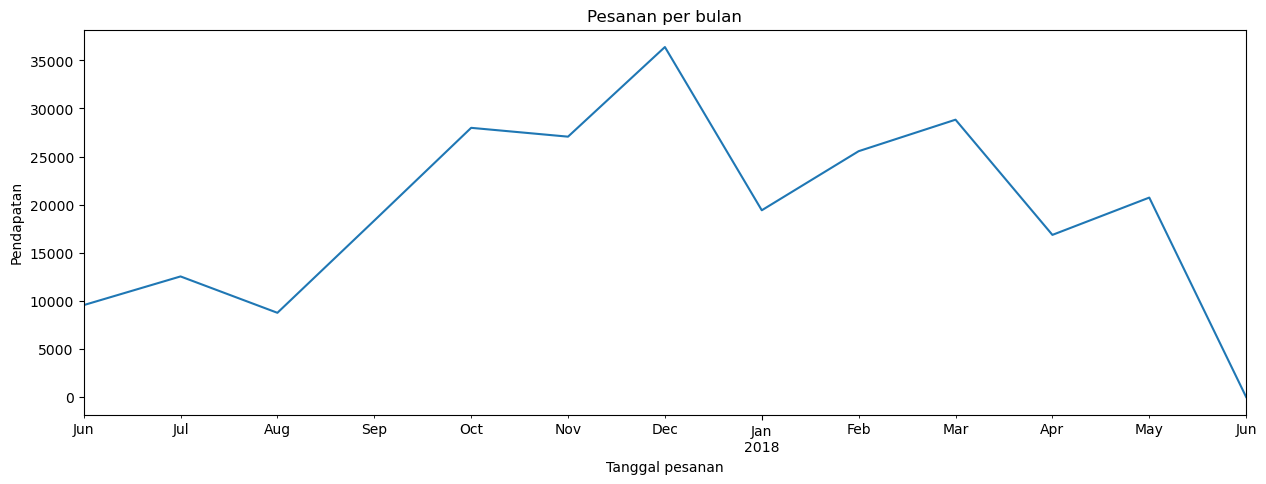

In [68]:
# Memeriksa distribusinya
revenue_orders['revenue'].plot.line(figsize=(15, 5))

# Judul
plt.title("Pesanan per bulan")

# Penamaan x,y-axis
plt.xlabel('Tanggal pesanan')
plt.ylabel('Pendapatan')

# Menampilkan hasilnya
plt.show()

Jumlah pesanan terbanyak terdapat pada bulan Desember-2017 yang mendatangkan sekitar 36389 dengan jumlah 6218 transaksi.

[Kembali ke tahapan](#back)

### Besar rata-rata pembelian <a id="7"></a>

In [69]:
# Rata-rata keseluruhan
print('Rata-rata pembelian:', round(orders_log['revenue'].mean(),4))

Rata-rata pembelian: 4.9996


In [70]:
# Sampel data
first_order.head(2)

,uid,first_order_date,first_order_month
0,313578113262317,2018-01-03,2018-01-01
1,1575281904278712,2017-06-03,2017-06-01


In [71]:
# Sampel data
orders_log.head(2)

,buy_ts,revenue,uid,order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01


In [72]:
# Menggabungkan dataset
orders_log_merge = pd.merge(orders_log, first_order, on='uid')

In [73]:
# Agg berdasarkan bulan pertama dilakukan pesanan
revenue_stats = orders_log_merge.groupby(['first_order_month', 'order_month']).agg({
    'buy_ts' : 'count',
    'revenue' : 'sum'
})

# Mengganti nama kolom
revenue_stats.rename(columns={'buy_ts':'transactions'}, inplace=True)

# Menampilkan hasilnya
revenue_stats

transactions   revenue
first_order_month order_month                        
2017-06-01        2017-06-01           2354   9557.49
                  2017-07-01            177    981.82
                  2017-08-01            174    885.34
                  2017-09-01            226   1931.30
                  2017-10-01            292   2068.58
...                                     ...       ...
2018-03-01        2018-05-01            176   1114.87
2018-04-01        2018-04-01           2495  10600.69
                  2018-05-01            195   1209.92
2018-05-01        2018-05-01           3249  13925.76
2018-06-01        2018-06-01              1      3.42

[79 rows x 2 columns]

In [74]:
# Menghitung pendapatan rata-rata per user
revenue_stats['revenue_per_user'] = revenue_stats['revenue'] / revenue_stats['transactions']

# Reset index
revenue_stats = revenue_stats.reset_index()

# Sampel data
revenue_stats.head()

,first_order_month,order_month,transactions,revenue,revenue_per_user
0,2017-06-01,2017-06-01,2354,9557.49,4.060106
1,2017-06-01,2017-07-01,177,981.82,5.547006
2,2017-06-01,2017-08-01,174,885.34,5.088161
3,2017-06-01,2017-09-01,226,1931.30,8.545575
4,2017-06-01,2017-10-01,292,2068.58,7.084178


In [75]:
# Lifetime kohort
revenue_stats['cohort_lifetime'] = revenue_stats['order_month'] - revenue_stats['first_order_month']

# Sampel data
revenue_stats.head()

,first_order_month,order_month,transactions,revenue,revenue_per_user,cohort_lifetime
0,2017-06-01,2017-06-01,2354,9557.49,4.060106,0 days
1,2017-06-01,2017-07-01,177,981.82,5.547006,30 days
2,2017-06-01,2017-08-01,174,885.34,5.088161,61 days
3,2017-06-01,2017-09-01,226,1931.30,8.545575,92 days
4,2017-06-01,2017-10-01,292,2068.58,7.084178,122 days


In [76]:
# Mengkonversikan nilai kolom cohort_lifetime menjadi bulan
revenue_stats['cohort_lifetime'] = (
    
    # jumlah hari kohort yang setara satu bulan
    revenue_stats['cohort_lifetime'] / np.timedelta64(1, 'M')
)

# Sampel data
revenue_stats.head()

,first_order_month,order_month,transactions,revenue,revenue_per_user,cohort_lifetime
0,2017-06-01,2017-06-01,2354,9557.49,4.060106,0.000000
1,2017-06-01,2017-07-01,177,981.82,5.547006,0.985647
2,2017-06-01,2017-08-01,174,885.34,5.088161,2.004148
3,2017-06-01,2017-09-01,226,1931.30,8.545575,3.022649
4,2017-06-01,2017-10-01,292,2068.58,7.084178,4.008296


In [77]:
# Membulatkan nilainya
revenue_stats['cohort_lifetime'] = (
    revenue_stats['cohort_lifetime'].round().astype('int')
)

# Sampel data
revenue_stats.head()

,first_order_month,order_month,transactions,revenue,revenue_per_user,cohort_lifetime
0,2017-06-01,2017-06-01,2354,9557.49,4.060106,0
1,2017-06-01,2017-07-01,177,981.82,5.547006,1
2,2017-06-01,2017-08-01,174,885.34,5.088161,2
3,2017-06-01,2017-09-01,226,1931.30,8.545575,3
4,2017-06-01,2017-10-01,292,2068.58,7.084178,4


In [78]:
# Memisahkan hari pada kolom first_order_month
revenue_stats['first_order_month'] = (
    revenue_stats['first_order_month'].dt.to_period('M')
)

# Sampel data
revenue_stats.head()

,first_order_month,order_month,transactions,revenue,revenue_per_user,cohort_lifetime
0,2017-06,2017-06-01,2354,9557.49,4.060106,0
1,2017-06,2017-07-01,177,981.82,5.547006,1
2,2017-06,2017-08-01,174,885.34,5.088161,2
3,2017-06,2017-09-01,226,1931.30,8.545575,3
4,2017-06,2017-10-01,292,2068.58,7.084178,4


In [79]:
# Pivot table rata-rata per pengguna
revenue_per_user_pivot = revenue_stats.pivot_table(
    index='first_order_month',
    columns='cohort_lifetime',
    values='revenue_per_user',
    aggfunc='mean'
)

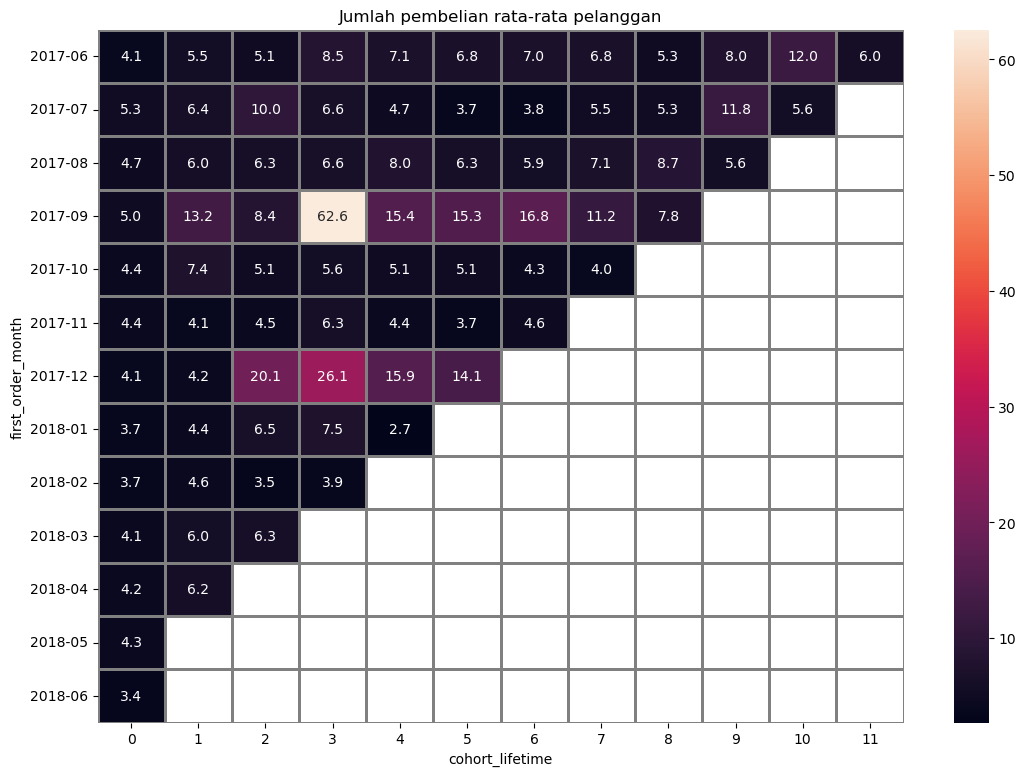

In [80]:
# Ukuran heatmap
plt.figure(figsize=(13, 9))

# Judul
plt.title('Jumlah pembelian rata-rata pelanggan')

# Heatmap
sns.heatmap(
    revenue_per_user_pivot,
    annot=True,
    fmt='.1f',
    linewidths=1,
    linecolor='gray',
)

# Menampilkan hasilnya
plt.show()

In [81]:
# Siklus bulan ke 6
revenue_per_user_pivot[6].mean()

7.048592492328408

Jika dilihat lebih detail seperti contohnya di siklus bulan ke 6 pelanggan, rata-rata pembelian sekitar 7.05

In [82]:
# Revenue tertinggi
revenue_stats.loc[(revenue_stats['first_order_month']=='2017-09') & (revenue_stats['cohort_lifetime']==3)]

,first_order_month,order_month,transactions,revenue,revenue_per_user,cohort_lifetime
36,2017-09,2017-12-01,164,10261.52,62.570244,3


Pengguna dengan revenue tertinggi mungkin memang menghabiskan sekian banyak untuk membeli sesuatu.

[Kembali ke tahapan](#back)

### Jumlah uang yang dikontribusikan (LTV) <a id="8"></a>

In [83]:
# Sampel data
orders_log.head()

,buy_ts,revenue,uid,order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01


In [84]:
# Mendapatkan tanggal pertama pesanan dilakukan
first_orders = orders_log.groupby('uid').agg({
    'order_month':'min'
}).reset_index()

# Memberi nama kolom
first_orders.columns = ['uid', 'first_order_month']

# Menampilkan hasilnya
first_orders.head()

,uid,first_order_month
0,313578113262317,2018-01-01
1,1575281904278712,2017-06-01
2,2429014661409475,2017-10-01
3,2464366381792757,2018-01-01
4,2551852515556206,2017-11-01


In [85]:
# Kohort
cohort_sizes = first_orders.groupby('first_order_month').agg({
    'uid': 'nunique'
}).reset_index()

# Memberi nama kolom
cohort_sizes.columns = ['first_order_month', 'n_buyers']

# Menampilkan hasilnya
cohort_sizes.head()

,first_order_month,n_buyers
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340


In [86]:
# Menggabungkan dataset
orders_ = pd.merge(orders_log,first_orders, on='uid')

# Menampilkan hasilnya
orders_.head()

,buy_ts,revenue,uid,order_month,first_order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01


In [87]:
# Agg ber dasarkan kolom `first_order_month` dan `order_month`
cohorts = orders_.groupby(['first_order_month','order_month']).agg({'revenue': 'sum'}).reset_index()

# Menampilkan hasilnya
cohorts.head()

,first_order_month,order_month,revenue
0,2017-06-01,2017-06-01,9557.49
1,2017-06-01,2017-07-01,981.82
2,2017-06-01,2017-08-01,885.34
3,2017-06-01,2017-09-01,1931.30
4,2017-06-01,2017-10-01,2068.58


In [88]:
# Menggabungkan dataset
report = pd.merge(cohort_sizes, cohorts, on='first_order_month')

# Menampilkan hasilnya
report.head()

,first_order_month,n_buyers,order_month,revenue
0,2017-06-01,2023,2017-06-01,9557.49
1,2017-06-01,2023,2017-07-01,981.82
2,2017-06-01,2023,2017-08-01,885.34
3,2017-06-01,2023,2017-09-01,1931.30
4,2017-06-01,2023,2017-10-01,2068.58


In [89]:
# Usia kohort
report['age'] = (
    report['order_month'] - report['first_order_month']
) / np.timedelta64(1, 'M')

# Membulatkan nilai
report['age'] = report['age'].round().astype('int')

# Menghitung LTV
report['ltv'] = report['revenue'] / report['n_buyers']

# Menampilkan hasilnya
report.head()

,first_order_month,n_buyers,order_month,revenue,age,ltv
0,2017-06-01,2023,2017-06-01,9557.49,0,4.724414
1,2017-06-01,2023,2017-07-01,981.82,1,0.485329
2,2017-06-01,2023,2017-08-01,885.34,2,0.437637
3,2017-06-01,2023,2017-09-01,1931.30,3,0.954671
4,2017-06-01,2023,2017-10-01,2068.58,4,1.022531


dikarenakan margin rate tidak diketahui maka anggap revenue sudah termasuk perhitungan margin rate.

In [90]:
# Membuat pivot tabel
output = report.pivot_table(
    index='first_order_month', columns='age', values='ltv', aggfunc='mean'
).round(2)

# Menampilkan hasil dan mengisi nilai kosong
output.fillna('')

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,4.72,0.49,0.44,0.95,1.02,0.74,0.95,0.58,0.55,0.61,0.57,0.26
2017-07-01,6.01,0.34,0.62,0.36,0.18,0.16,0.12,0.14,0.16,0.15,0.16,
2017-08-01,5.28,0.47,0.46,0.39,0.49,0.28,0.21,0.41,0.29,0.19,,
2017-09-01,5.64,1.12,0.52,3.98,0.4,0.65,0.7,0.24,0.18,,,
2017-10-01,5.00,0.54,0.19,0.16,0.15,0.12,0.08,0.12,,,,
2017-11-01,5.15,0.4,0.2,0.32,0.15,0.05,0.11,,,,,
2017-12-01,4.74,0.26,0.93,1.07,0.31,0.34,,,,,,
2018-01-01,4.14,0.29,0.3,0.14,0.06,,,,,,,
2018-02-01,4.16,0.28,0.08,0.07,,,,,,,,


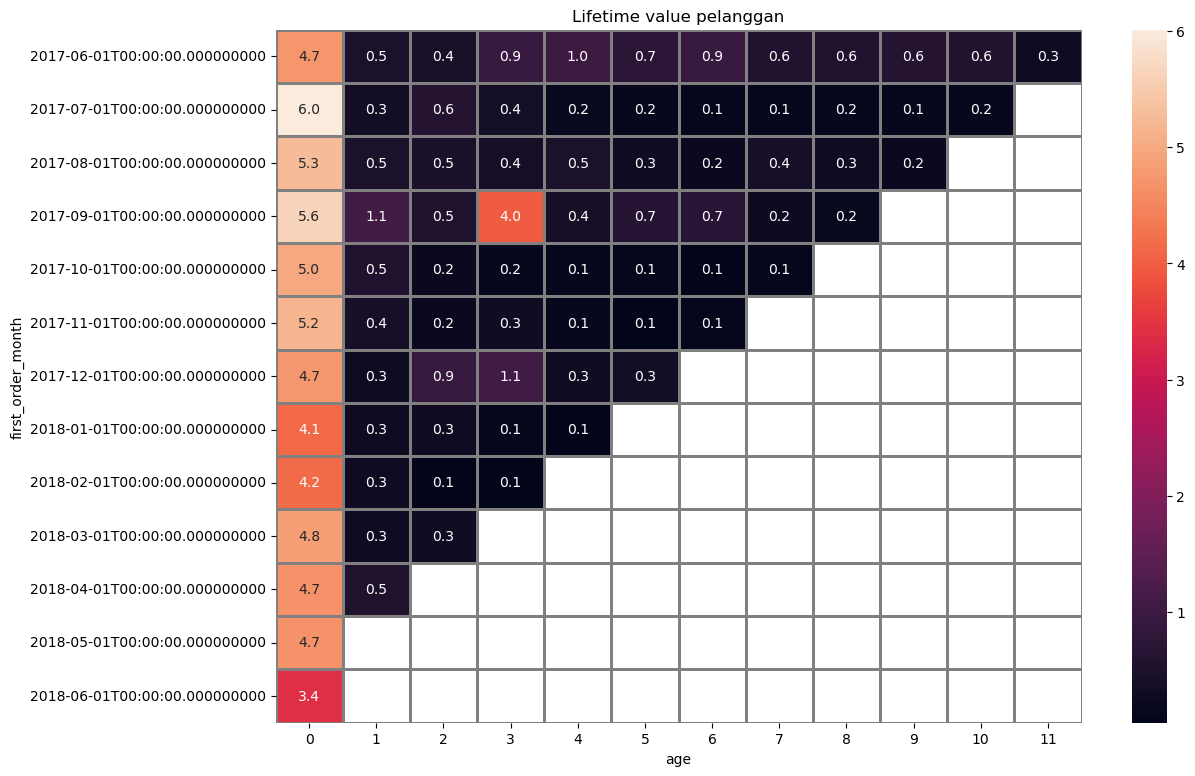

In [91]:
# Ukuran heatmap
plt.figure(figsize=(13, 9))

# Judul
plt.title('Lifetime value pelanggan')

# Heatmap
sns.heatmap(
    output,
    annot=True,
    fmt='.1f',
    linewidths=1,
    linecolor='gray',
)

# Menampilkan hasilnya
plt.show()

In [92]:
# Siklus bulan ke 6
output.cumsum(axis=1).mean(axis=0)[6]

8.385

Sekitar total 8.39 dihabiskan pelanggan selama 6 bulan sejak pesanan pertama dilakukan.

[Kembali ke tahapan](#back)

###  Jumlah uang yang dihabiskan <a id="9"></a>

In [93]:
# Sampel data
costs.head(3)

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53


In [94]:
# Menampilkan hasilnya
print('Jumlah keseluruhan uang yang dihabiskan:', costs['costs'].sum())

Jumlah keseluruhan uang yang dihabiskan: 329131.62


Jika per sumber,

In [95]:
# Agg dataset
source_stats = costs.groupby(['source_id']).agg({
    'costs' : 'sum'
})

# Mengurutkan nilai
source_stats = source_stats.sort_values(by='costs', ascending=False)

# Menampilkan hasilnya
source_stats

,costs
source_id,
3,141321.63
4,61073.60
5,51757.10
2,42806.04
1,20833.27
10,5822.49
9,5517.49


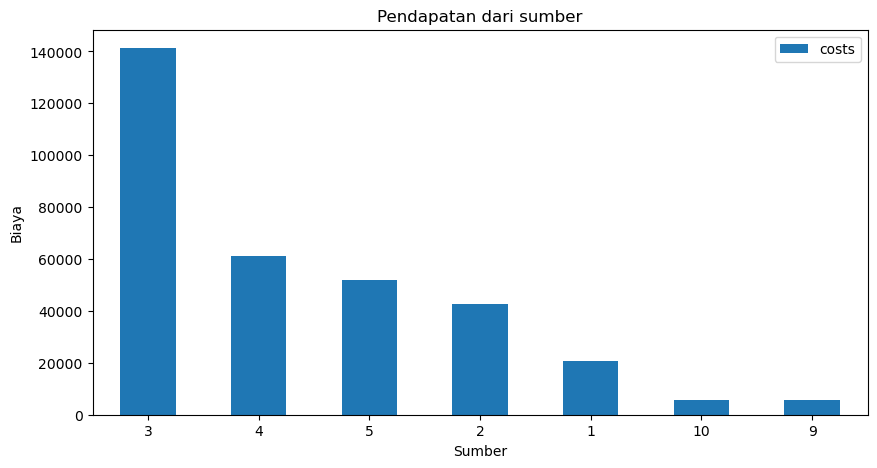

In [96]:
# Memeriksa distribusinya
source_stats.plot(kind='bar', figsize=(10, 5))

# Judul
plt.title("Pendapatan dari sumber")

# Penamaan x,y-axis
plt.xlabel('Sumber')
plt.ylabel('Biaya')

# Memutar label x
plt.xticks(rotation=0)

# Menampilkan hasilnya
plt.show()

Sumber 3 mendominasi sumber-sumber yang lainnya, dan sumber 9 menjadi yang paling sedikit menghabiskan biaya.

Jika dari waktu ke waktu,

In [97]:
# Mendapatkan bulan
costs['dt_month'] = costs['dt'].astype('datetime64[M]')

In [98]:
# Agg dataset
costs_per_month = costs.groupby('dt_month').agg({
    'costs' : 'sum'
})

# Menampilkan hasilnya
costs_per_month

,costs
dt_month,
2017-06-01,18015.00
2017-07-01,18240.59
2017-08-01,14790.54
2017-09-01,24368.91
2017-10-01,36322.88
2017-11-01,37907.88
2017-12-01,38315.35
2018-01-01,33518.52
2018-02-01,32723.03


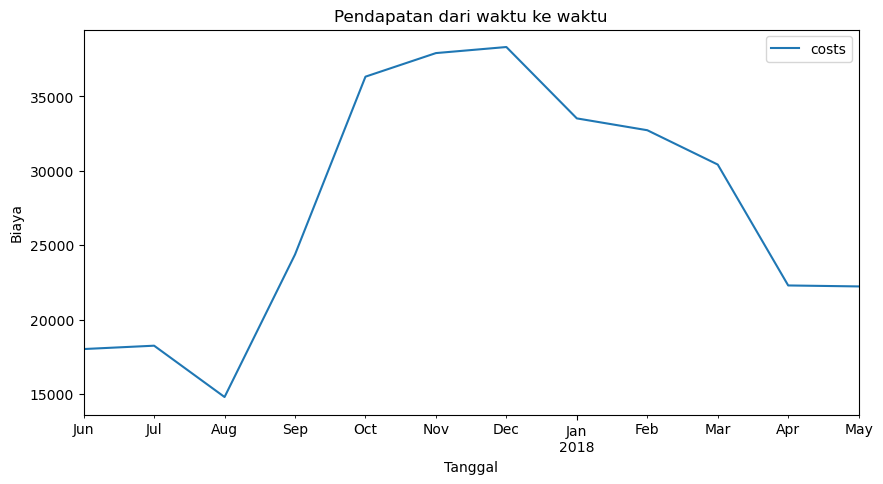

In [99]:
# Memeriksa distribusinya
costs_per_month.plot(kind='line', figsize=(10, 5))

# Judul
plt.title("Pendapatan dari waktu ke waktu")

# Penamaan x,y-axis
plt.xlabel('Tanggal')
plt.ylabel('Biaya')

# Menampilkan hasilnya
plt.show()

Bulan Desember-2017 menjadi yang terbanyak menghabiskan biaya, dan terendah ada di bulan Agustus-2017.

[Kembali ke tahapan](#back)

### Biaya akuisisi pelanggan dari masing-masing sumber (CAC) <a id="10"></a>

In [100]:
# Menemukan uid berdasarkan sumber
source_with_buyers = visits_merge.groupby('source_id',as_index=False).agg({
    'uid' : 'nunique'
})

# Menampilkan hasilnya
source_with_buyers

,source_id,uid
0,1,18999
1,10,8067
2,2,26245
3,3,74756
4,4,83525
5,5,56974
6,6,6
7,7,34
8,9,9264


In [101]:
# Reset index
source_stats.reset_index(inplace=True)

In [102]:
# Memeriksa hasilnya
source_stats

,source_id,costs
0,3,141321.63
1,4,61073.60
2,5,51757.10
3,2,42806.04
4,1,20833.27
5,10,5822.49
6,9,5517.49


In [103]:
# Menggabungkan dataset
user_cost = source_stats.merge(source_with_buyers, on='source_id')

# Mendapatkan cac dari user
user_cost['cac'] = user_cost['costs']/user_cost['uid']

In [104]:
# Agg cac
user_cost_agg = user_cost.groupby('source_id').agg({
    'cac' : 'mean'
})

# Mengurutkan nilai
user_cost_agg = user_cost_agg.sort_values(by='cac', ascending=False)

# Menampilkan hasilnya
user_cost_agg

,cac
source_id,
3,1.890439
2,1.631017
1,1.096546
5,0.908434
4,0.731201
10,0.721766
9,0.595584


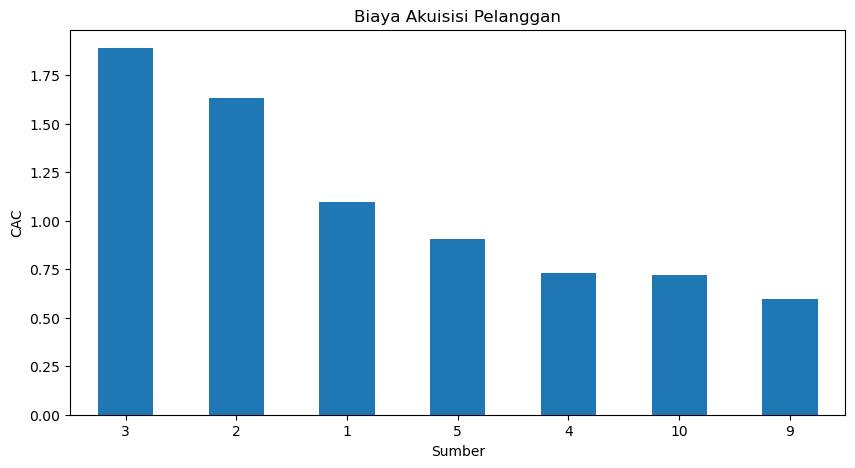

In [105]:
# Memeriksa distribusinya
user_cost_agg['cac'].plot(kind='bar', figsize=(10, 5))

# Judul histogram
plt.title("Biaya Akuisisi Pelanggan")

# Penamaan x,y-axis
plt.xlabel('Sumber')
plt.ylabel('CAC')

# Memutar label x
plt.xticks(rotation=0)

# Menampilkan hasilnya
plt.show()

Biaya yang diperlukan di sumber ke 3 menjadi yang terbanyak, diikuti CAC sumber ke 2.

[Kembali ke tahapan](#back)

### Seberapa menguntungkannya investasi tersebut (ROMI) <a id="11"></a>

In [106]:
# Sampel data
report.head()

,first_order_month,n_buyers,order_month,revenue,age,ltv
0,2017-06-01,2023,2017-06-01,9557.49,0,4.724414
1,2017-06-01,2023,2017-07-01,981.82,1,0.485329
2,2017-06-01,2023,2017-08-01,885.34,2,0.437637
3,2017-06-01,2023,2017-09-01,1931.30,3,0.954671
4,2017-06-01,2023,2017-10-01,2068.58,4,1.022531


In [107]:
# Sampel data
costs_per_month.head()

,costs
dt_month,
2017-06-01,18015.00
2017-07-01,18240.59
2017-08-01,14790.54
2017-09-01,24368.91
2017-10-01,36322.88


In [108]:
# Menggabungkan dataset
report_final = pd.merge(report, costs_per_month, left_on='first_order_month', right_on='dt_month')

# Menampilkan hasilnya
report_final.head()

,first_order_month,n_buyers,order_month,revenue,age,ltv,costs
0,2017-06-01,2023,2017-06-01,9557.49,0,4.724414,18015.0
1,2017-06-01,2023,2017-07-01,981.82,1,0.485329,18015.0
2,2017-06-01,2023,2017-08-01,885.34,2,0.437637,18015.0
3,2017-06-01,2023,2017-09-01,1931.30,3,0.954671,18015.0
4,2017-06-01,2023,2017-10-01,2068.58,4,1.022531,18015.0


In [109]:
# Menghitung CAC
report_final['cac'] = report_final['costs'] / report_final['n_buyers']

# Menampilkan hasilnya
report_final.head()

,first_order_month,n_buyers,order_month,revenue,age,ltv,costs,cac
0,2017-06-01,2023,2017-06-01,9557.49,0,4.724414,18015.0,8.905091
1,2017-06-01,2023,2017-07-01,981.82,1,0.485329,18015.0,8.905091
2,2017-06-01,2023,2017-08-01,885.34,2,0.437637,18015.0,8.905091
3,2017-06-01,2023,2017-09-01,1931.30,3,0.954671,18015.0,8.905091
4,2017-06-01,2023,2017-10-01,2068.58,4,1.022531,18015.0,8.905091


In [110]:
# Menghitung ROMI
report_final['romi'] = report_final['ltv'] / report_final['cac']

# Membuat pivot table
output_final = report_final.pivot_table(
    index='first_order_month', columns='age', values='romi', aggfunc='mean'
)

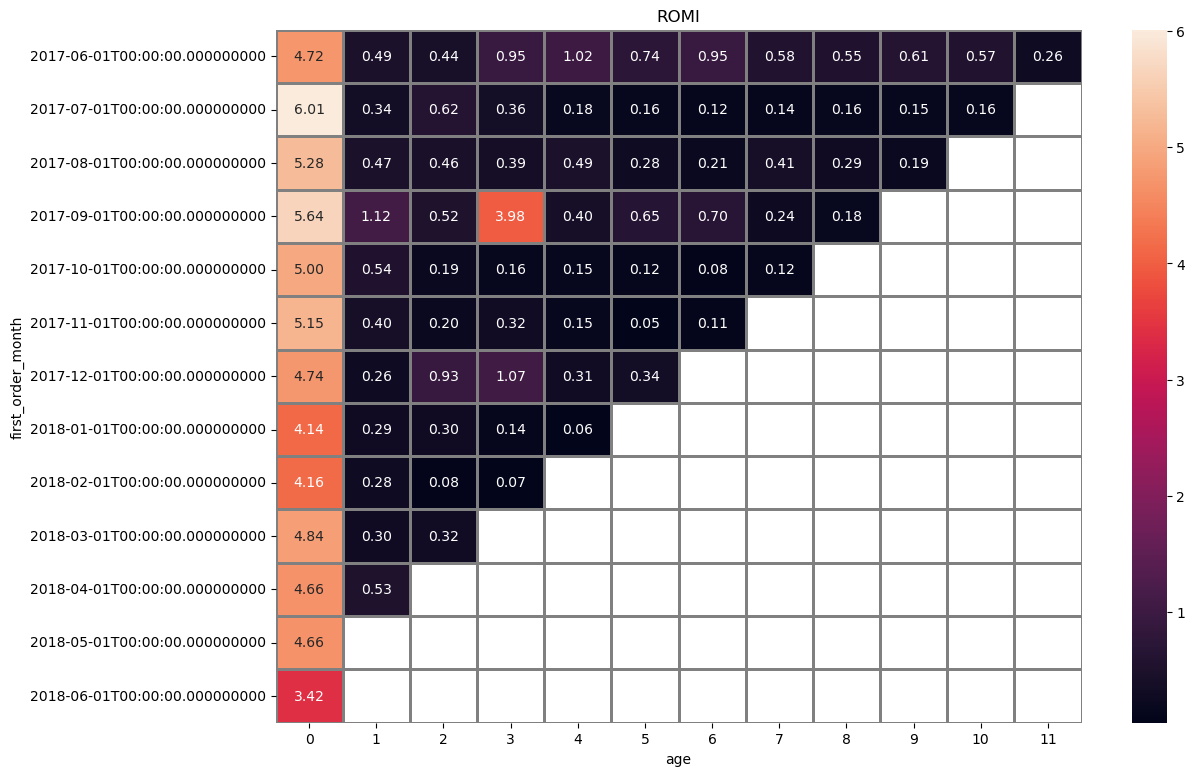

In [111]:
# Ukuran heatmap
plt.figure(figsize=(13, 9))

# Judul
plt.title('ROMI')

# Heatmap
sns.heatmap(
    output,
    annot=True,
    fmt='.2f',
    linewidths=1,
    linecolor='gray',
)

# Menampilkan hasilnya
plt.show()

In [112]:
# Menghitung rata-rata nilai di setiap kolom
output.mean(axis=0)

age
0     4.801538
1     0.456364
2     0.406000
3     0.826667
4     0.345000
5     0.334286
6     0.361667
7     0.298000
8     0.295000
9     0.316667
10    0.365000
11    0.260000
dtype: float64

Secara rata-rata, tidak ada satu pun kohort yang berhasil menutupi biaya pemasaran. Tampaknya, tim pemasaran perlu membuat beberapa perubahan.

[Kembali ke tahapan](#back)

## Kesimpulan Umum <a id="Kesimpulan"></a>

Setelah melalui proses perbaikan data dan melakukan analisa, berikut hasil temuan:
1. Pengguna lebih menggunakan platform paling tidak 1 kali perhari, dengan rata-rata 60 detik per pengguna
2. Umumnya disaat pengguna menggunakan platform mereka juga melakukan pembelian, Desember menjadi bulan yang paling banyak menerima pendapatan
3. Rata-rata pengguna menghabiskan paling tidak 5 dollar
4. Tidak ada satu pun kohort yang berhasil menutupi biaya pemasaran.
5. Sumber no.3 platform menjadi sumber yang direkomendasikan karena sumber tersebut menjadi sumber yang mendatangkan keuntungan terbanyak dari semua platform namun perlu juga diperhatikan karena cac dari platform tersebut juga tertinggi.

[Kembali ke tahapan](#back)